<a href="https://colab.research.google.com/github/mgfrantz/CodingNomads-Intro-To-Deep-Learning-Labs/blob/master/Basic_Tensor_Operations_workset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is a tensor?

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
def describe_tensor(t):
    """
    Describes a few basic elements about any torch.Tensor.
    Prints out shape, number of elements, and rank.
    """
    print(f"Shape (Tensor.shape): {t.shape}")
    print(f"Number of elements (Tensor.numel()): {t.numel()}")
    print(f"Number of dimensions, or rank + 1 (Tensor.ndim): {t.ndim}")
    print(f"Tensor type (Tensor.dtype): {t.dtype}")

In [ ]:
rank0tensor = torch.tensor(1)
rank0tensor

tensor(1)

In [ ]:
describe_tensor(rank0tensor)

Shape (Tensor.shape): torch.Size([])
Number of elements (Tensor.numel()): 1
Number of dimensions, or rank + 1 (Tensor.ndim): 0
Tensor type (Tensor.dtype): torch.int64


In [ ]:
rank1tensor = torch.tensor([1.,2,3])
rank1tensor

tensor([1., 2., 3.])

In [ ]:
describe_tensor(rank1tensor)

Shape (Tensor.shape): torch.Size([3])
Number of elements (Tensor.numel()): 3
Number of dimensions, or rank + 1 (Tensor.ndim): 1
Tensor type (Tensor.dtype): torch.float32


In [ ]:
rank2tensor = torch.tensor(
    [
     [1.,2,3],
     [4,5,6],
     [7,8,9]
    ]
)
rank2tensor

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [ ]:
describe_tensor(rank2tensor)

Shape (Tensor.shape): torch.Size([3, 3])
Number of elements (Tensor.numel()): 9
Number of dimensions, or rank + 1 (Tensor.ndim): 2
Tensor type (Tensor.dtype): torch.float32


In [ ]:
rank3tensor = torch.rand(3, 3, 3)
rank3tensor

tensor([[[0.6502, 0.5590, 0.4382],
         [0.8881, 0.7488, 0.7707],
         [0.5850, 0.4385, 0.0801]],

        [[0.6449, 0.0635, 0.5618],
         [0.3032, 0.5965, 0.3708],
         [0.4521, 0.6521, 0.5256]],

        [[0.5356, 0.8215, 0.0502],
         [0.5130, 0.8524, 0.7246],
         [0.7495, 0.0711, 0.7164]]])

In [ ]:
describe_tensor(rank3tensor)

Shape (Tensor.shape): torch.Size([3, 3, 3])
Number of elements (Tensor.numel()): 27
Number of dimensions, or rank + 1 (Tensor.ndim): 3
Tensor type (Tensor.dtype): torch.float32


In [ ]:
# We won't try to visualize this tensor since it doesn't fit neatly into my brain.
# This is just to show we can make big tensors, even if we don't have a practical use for them.
n_dim = 10
describe_tensor(torch.randn(*(tuple([3] * n_dim))))

Shape (Tensor.shape): torch.Size([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])
Number of elements (Tensor.numel()): 59049
Number of dimensions, or rank + 1 (Tensor.ndim): 10
Tensor type (Tensor.dtype): torch.float32


## Exercise 3.1: Torch `dtype`s

Read through the [documentation](https://pytorch.org/docs/stable/tensor_attributes.html#torch-dtype) on different tensor types.

Create a function that uses the [`Tensor.element_size()`](https://pytorch.org/docs/stable/generated/torch.Tensor.element_size.html#) and `Tensor.numel()` methods to calculate the memory footprint of a tensor in megabytes.
There are 1e6 bytes in a megabyte.
Then, create at least 3 tensors with the same shape but different `dtype`s.
What's the difference in the memory footprints of the following tensors?


In [ ]:
def memory_footprint(tensor):
    raise NotImplementedError('Implement this function!')

<!-- split -->
# Scalar operations

In [ ]:
x = torch.ones(4).float()
x

tensor([1., 1., 1., 1.])

In [ ]:
x * 4

tensor([4., 4., 4., 4.])

In [ ]:
x + 4

tensor([5., 5., 5., 5.])

In [ ]:
x - 2

tensor([-1., -1., -1., -1.])

In [ ]:
x / 4

tensor([0.2500, 0.2500, 0.2500, 0.2500])

<!-- split -->
# Element-wise operations

In [ ]:
x = torch.rand(4)
y = torch.rand(4)
x, y

(tensor([0.9877, 0.6815, 0.8246, 0.5108]),
 tensor([0.8006, 0.1437, 0.3687, 0.7916]))

In [ ]:
x + y

tensor([1.7883, 0.8252, 1.1932, 1.3024])

In [ ]:
x - y

tensor([ 0.1872,  0.5377,  0.4559, -0.2808])

In [ ]:
x * y

tensor([0.7908, 0.0980, 0.3040, 0.4043])

In [ ]:
x / y

tensor([1.2338, 4.7410, 2.2364, 0.6453])

<!-- split -->
## Broadcasting

In [ ]:
x = torch.rand(2, 4)
y = torch.rand(4)
x, y

(tensor([[0.3069, 0.2921, 0.4389, 0.9694],
         [0.0865, 0.9505, 0.3013, 0.0970]]),
 tensor([0.6092, 0.2694, 0.0987, 0.3957]))

In [ ]:
x * y

tensor([[0.1870, 0.0787, 0.0433, 0.3836],
        [0.0527, 0.2561, 0.0298, 0.0384]])

In [ ]:
x = torch.rand(3, 2, 4)
x, y

(tensor([[[0.1328, 0.0276, 0.4421, 0.3595],
          [0.3541, 0.9148, 0.9579, 0.4189]],
 
         [[0.2048, 0.9181, 0.2170, 0.0124],
          [0.3433, 0.3056, 0.2260, 0.1106]],
 
         [[0.2013, 0.4845, 0.5037, 0.2426],
          [0.8430, 0.8288, 0.6430, 0.8516]]]),
 tensor([0.6092, 0.2694, 0.0987, 0.3957]))

In [ ]:
x * y

tensor([[[0.0809, 0.0074, 0.0437, 0.1423],
         [0.2157, 0.2465, 0.0946, 0.1657]],

        [[0.1248, 0.2474, 0.0214, 0.0049],
         [0.2091, 0.0823, 0.0223, 0.0438]],

        [[0.1226, 0.1305, 0.0497, 0.0960],
         [0.5136, 0.2233, 0.0635, 0.3370]]])

<!-- split -->
## Tensor multiplication: the dot product of two vectors


In [ ]:
x = torch.tensor([1, 2, 3, 4])
y = torch.tensor([2, 3, 4, 5])

In [ ]:
# Let's do this using element-wise operations
(x * y).sum()

tensor(40)

In [ ]:
# torch.matmul does matrix multiplication.
torch.matmul(x, y)

tensor(40)

In [ ]:
# @ is shorthand for matrix multiplication as well.
x@y

tensor(40)

In [ ]:
y@x

tensor(40)

<!-- split -->
## Tensor multiplication: matrix multiplication

In [ ]:
X = torch.tensor([[1, 2], [3, 4]])
Y = torch.tensor([[2, 3, 4], [5, 6, 7]])

In [ ]:
X@Y

tensor([[12, 15, 18],
        [26, 33, 40]])

In [ ]:
(torch.randn(16, 3, 3, 3) @ torch.randn(3, 3, 12)).shape

## Exercise 3.2: matrix multiplication

Previously, we tried to multiply `X@Y`.
Will `Y@X` work?
Why or why not?

In the cell below, define `B`  using `torch.rand` so that `A@B` returns a tensor with shape (4, 7).

In [ ]:
A = torch.rand(4, 2)
B = ...

In [ ]:
if not isinstance(B, type(...)):
    assert (A@B).shape == (4, 7)
else:
    print('Please define B such that (A@B).shape = (4, 7)')

Please define B such that (A@B).shape = (4, 7)


<!-- split -->
## Useful tensor functions and methods

In [ ]:
X = torch.tensor(list(range(27))).reshape(3,3,3)
X

In [ ]:
X.sum()

tensor(10)

In [ ]:
# Change the dim parameter to see how the results change
X.sum(dim=0)

tensor([4, 6])

<!-- split -->
## Reshaping tensors

In [ ]:
# Create a vector
X = torch.arange(0, 3*3*3)
X

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26])

Let's reshape `X` to be "image-like."
This means X should be a `Tensor` with 3 dimensions - a height, a width, and a number of channels (normally 3).

In [ ]:
# Reshape it into a 3x3x3 to be "image-like"
X = X.reshape(3, 3, 3)
X

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

In [ ]:
# How do we add a "batch_dim"?
# Unsqueeze addes an empty dimension
# Squeeze takes away empty dimensions
X.shape, X.unsqueeze(0).shape

(torch.Size([3, 3, 3]), torch.Size([1, 3, 3, 3]))

In [ ]:
# Use unsqueeze to create a "batch" 
torch.cat([X.unsqueeze(0), X.unsqueeze(0)]).shape

torch.Size([2, 3, 3, 3])

In [ ]:
y = torch.randn(1, 1, 1, 1, 1, 1, 8)
y, y.shape, y.squeeze(), y.squeeze().shape, y.squeeze(2).shape

(tensor([[[[[[[ 1.8693,  0.6781, -1.1226,  1.4647, -1.1228,  0.4645, -1.6797,
                1.0779]]]]]]]),
 torch.Size([1, 1, 1, 1, 1, 1, 8]),
 tensor([ 1.8693,  0.6781, -1.1226,  1.4647, -1.1228,  0.4645, -1.6797,  1.0779]),
 torch.Size([8]),
 torch.Size([1, 1, 1, 1, 1, 8]))

In [ ]:
# squeeze and unsqueeze are opposites
assert X.shape == X.unsqueeze(0).squeeze(0).shape

In [ ]:
# Swap the 1nd and 2rd dim
X.permute(0, 2, 1)

tensor([[[ 0,  3,  6],
         [ 1,  4,  7],
         [ 2,  5,  8]],

        [[ 9, 12, 15],
         [10, 13, 16],
         [11, 14, 17]],

        [[18, 21, 24],
         [19, 22, 25],
         [20, 23, 26]]])

<!-- split -->
## Making your own functions: Sigmoid and softmax

## Exercise 3.3: Write your own `sigmoid` function`

The `softmax` function is given.
Use a similar approach to complete the `sigmoid` function.
$e^x$ in `torch` is expressed using `torch.exp(x)`.

In [ ]:
def sigmoid(x):
    raise NotImplementedError('Please define the sigmoid function')
    
def softmax(x, dim):
    return torch.exp(x)/torch.exp(x).sum(dim=dim)

We can see below that over the same range of values, sigmoid and softmax 

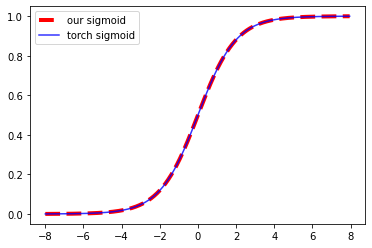

In [ ]:
x = torch.arange(-8, 8, 0.05)
plt.plot(x, sigmoid(x), label='our sigmoid', ls='--', color='r', linewidth=4)
plt.plot(x, torch.sigmoid(x), label='torch sigmoid', c='b', alpha=0.8)
plt.legend()

In [ ]:
X = torch.rand(3, 3)
print(
    'X:', X, 
    'Our softmax(x):', softmax(X, dim=0),
    'Torch softmax(x):', torch.softmax(X, dim=0), 
    'Sanity check: row sums:', softmax(X, dim=0).sum(dim=0), 
    sep='\n'
)

X:
tensor([[0.7228, 0.3156, 0.6034],
        [0.4798, 0.3318, 0.6370],
        [0.9450, 0.2363, 0.7044]])
our softmax(x):
tensor([[0.3297, 0.3401, 0.3184],
        [0.2586, 0.3457, 0.3293],
        [0.4117, 0.3142, 0.3523]])
torch softmax(x):
tensor([[0.3297, 0.3401, 0.3184],
        [0.2586, 0.3457, 0.3293],
        [0.4117, 0.3142, 0.3523]])
Sanity check: row sums:
tensor([1.0000, 1.0000, 1.0000])


In [ ]:
# We can also call softmax on a tensor
X.softmax(dim=0)

tensor([[0.3297, 0.3401, 0.3184],
        [0.2586, 0.3457, 0.3293],
        [0.4117, 0.3142, 0.3523]])